<a href="https://colab.research.google.com/github/dynasty-29/GDI_Project/blob/main/Team_atreides_GDI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

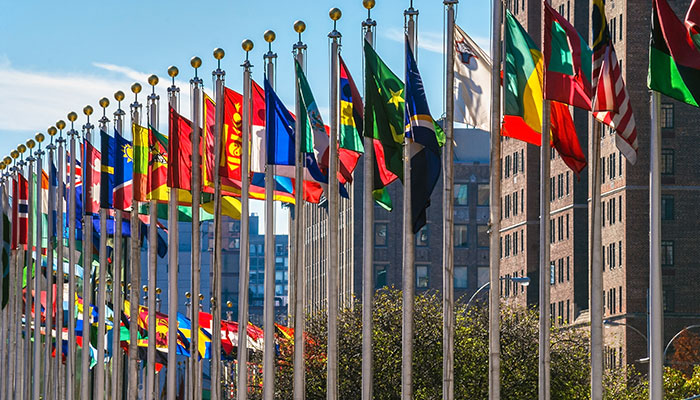

## **Introduction**

The Gender Development Index (GDI) measures gender gaps in human development achievements by accounting for disparities between women and men in three basic dimensions of human development—health, knowledge, and living standards using the same component indicators as in the Human Development Index (HDI). The GDI is the ratio of the HDIs calculated separately for females and males using the same methodology as in the HDI. It is a direct measure of the gender gap showing the female HDI as a percentage of the male HDI.

## **Problem statement**

United Nations launched its sustainable development agenda in 2015, reflecting the growing understanding by Member States that a development model that is sustainable for this and future generations offers the best path forward for reducing poverty and improving the lives of people everywhere.Gender disparity a variable measured by gender development index is still a problem globally with the claim of the index being higher presummed average of 0.943. Team atreides has been contracted  to figure out how we can predict future GDI index. As the Analytics team we will help provide an indication of the global status in terms of gender development while providing insights into some of the key dimensional index that might drive gender development outcomes.We will be performing hypothesis testing to try to prove or disapprove the claim.

# **Metric for Success**

To determine the gender development index globally for our analysis using various dimension index we will need to obtain the following as our measure of success: 


*   Find and deal with outliers, anomalies, and missing data within the dataset.

*   Comprehensive EDA with aim of univariate, bivariate and multivariate analysis


*   Choose the best predictive model with an accuracy score of 70% and above
*   Perform hypothesis testing to prove and disapprove the stated claim

# **Recording the Experimental Design**

1)Defining the research question

2)Finding and dealing with outliers, anomalies, and missing data within the dataset.

3)Plot appropriate univariate and bivariate summaries recording our observations.

4)Implement the solution by performing hypothesis testing.

5)Challenge your solution by providing insights on how you can make improvements. Defining the research question

# **Relevance of the data**

Data used for analysis was obtained from an open datasource Kaggle. The provided dataset is an aggregation, by country GDI, HDI and Life expectancy of of men and women in 2019.Dataset used is relevant for this analysis

# **Research questions**

1. Which countries have the largest and the lowest GDI?

2. What is the average years of education a female receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?

3. What is the average years of education a male receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?

4. What is the average gross national income per capita a female receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?


5. What is the average gross national income per capita a male receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?


## **Data Understanding**

# **0.1 Importing required libraries**

In [1]:
#loading import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os

import plotly.express as px

In [2]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **0.2 Loading Data**

In [4]:
#loading our datasets and viewing first and last rows
gdi = pd.read_csv('GDI.csv')


In [5]:
#previewing dataset top rows
gdi.head()


,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"


In [6]:
#previewing dataset bottom rows
gdi.tail()

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"
189,189.0,Niger,0.724,5,0.321,0.443,63.6,61.3,5.7,7.2,1.4,2.8,536,"1,859"


# **0.3 Checking the data**

In [7]:
#checking more information about dataset
gdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HDI Rank                    189 non-null    float64
 1   Country                     189 non-null    object 
 2   GDI_Value                   190 non-null    object 
 3   GDI_Group                   190 non-null    object 
 4   HDI_Female                  190 non-null    object 
 5   HDI_Male                    190 non-null    object 
 6   Lif_Expec_Female            190 non-null    object 
 7   Lif_Excep_Male              190 non-null    object 
 8   Excep_Yrs_Schooling_Female  190 non-null    object 
 9   Excep_Yrs_Schooling_Male    190 non-null    object 
 10  Mean_Yrs_Schooling_Female   190 non-null    object 
 11  Mean_Yrs_Schooling_Male     190 non-null    object 
 12  GNI_PC_Female               190 non-null    object 
 13  GNI_PC_Male                 190 non

In [8]:
#shape of our dataset
gdi.shape

(190, 14)

**Important notes:**

1. The row at index 0 is of no use to us and it is the data that we need to clean.
2. All the columns are of object type so we need to convert them to float type.

# **1.0 Data Cleaning**



Before trying to prove or disapprove our hypothesis with the aim of investigating the claims we will first clean our data sets


**1.1 Validity check**

In [9]:
#checking column names
gdi.columns

Index(['HDI Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

In [10]:
#dropping the index 0 row
df = gdi.drop([0], axis=0, inplace=True)


In [11]:
gdi.head()

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"


**1.2. Accuracy check**

In [12]:
#ensuring we have the correct data types
gdi.dtypes

HDI Rank                      float64
Country                        object
GDI_Value                      object
GDI_Group                      object
HDI_Female                     object
HDI_Male                       object
Lif_Expec_Female               object
Lif_Excep_Male                 object
Excep_Yrs_Schooling_Female     object
Excep_Yrs_Schooling_Male       object
Mean_Yrs_Schooling_Female      object
Mean_Yrs_Schooling_Male        object
GNI_PC_Female                  object
GNI_PC_Male                    object
dtype: object

We now need to change our data type to float

In [13]:
columns = gdi.columns
columns = columns.drop(['HDI Rank', 'Country'])

In [14]:
for col in columns:
#     col = pd.to_numeric(column)
    print(col," : ",gdi[col].min(),gdi[col].max())

GDI_Value  :  .. 1.036
GDI_Group  :  .. 5
HDI_Female  :  .. 0.949
HDI_Male  :  .. 0.965
Lif_Expec_Female  :  .. 87.7
Lif_Excep_Male  :  .. 82.0
Excep_Yrs_Schooling_Female  :  .. 9.7
Excep_Yrs_Schooling_Male  :  .. 9.8
Mean_Yrs_Schooling_Female  :  .. 9.9
Mean_Yrs_Schooling_Male  :  .. 9.9
GNI_PC_Female  :  .. 989
GNI_PC_Male  :  .. 9,230


We also have '...' in our data so going to remove them

In [15]:
gdi[gdi['GDI_Value']=='..']

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
21,19.0,Liechtenstein,..,..,..,..,..,..,13.8,16.0,..,..,..,..
36,36.0,Andorra,..,..,..,..,..,..,..,..,10.4,10.6,..,..
50,50.0,Palau,..,..,..,..,..,..,16.3,15.3,..,..,..,..
58,58.0,Bahamas,..,..,..,..,76.1,71.7,..,..,11.7,11.4,"27,560","40,295"
67,67.0,Seychelles,..,..,..,..,77.4,69.9,15.3,13.1,9.9,10.1,..,..
74,74.0,Grenada,..,..,..,..,75.0,70.1,17.0,16.2,..,..,..,..
76,74.0,Saint Kitts and Nevis,..,..,..,..,..,..,14.0,13.7,..,..,..,..
78,78.0,Antigua and Barbuda,..,..,..,..,78.1,75.9,13.2,12.1,..,..,..,..
93,93.0,Fiji,..,..,..,..,69.3,65.7,..,..,11.0,10.8,"8,317","17,577"
94,94.0,Dominica,..,..,..,..,..,..,..,..,..,..,..,..


In [16]:
gdi[gdi['GDI_Value']=='..'].shape

(22, 14)

Before moving forward its important to note that HDI ranking is in 4 groups as per the UNDP website with countries ranking 1 t0 66 in first group (Very high Human development), 67 to 119 in the second group (High  human development), 120 to 156 in the third group (Medium human development)  and lastly 157 to 189 in the fouth group (Low  Human development). Therefore for our dataset in column 'GDI_group' with ".." will replace them according to  the UN guidelines for GDI grouping.

In [17]:
gdi['GDI_Group'].loc[[21,36,40,50,58]] = 1
gdi['GDI_Group'].loc[[67, 70,74,76, 78,91,92, 93, 94,102, 111, 112,115,116, 117, ]] = 2
gdi['GDI_Group'].loc[[121,123,125,131,134, 136, 140, 145, 151,154, 155,156]] = 3
gdi['GDI_Group'].loc[[157,158,159,161,162, 166,167,168,169,170,172,173,175, 176, 178,179,180,182,184,185,188,189]] = 4
gdi['GDI_Group'].replace([5], 4, inplace=True)

gdi

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
6,6.0,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,"45,277","65,599"
7,7.0,Sweden,0.983,1,0.936,0.953,84.6,81.0,20.4,18.6,12.7,12.4,"47,709","61,287"
8,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
9,8.0,Netherlands,0.966,2,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"
10,10.0,Denmark,0.983,1,0.931,0.948,82.9,78.9,19.6,18.3,12.8,12.4,"49,296","68,134"


In [18]:
gdi[gdi['GDI_Value']=='..']

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
21,19.0,Liechtenstein,..,1,..,..,..,..,13.8,16.0,..,..,..,..
36,36.0,Andorra,..,1,..,..,..,..,..,..,10.4,10.6,..,..
50,50.0,Palau,..,1,..,..,..,..,16.3,15.3,..,..,..,..
58,58.0,Bahamas,..,1,..,..,76.1,71.7,..,..,11.7,11.4,"27,560","40,295"
67,67.0,Seychelles,..,2,..,..,77.4,69.9,15.3,13.1,9.9,10.1,..,..
74,74.0,Grenada,..,2,..,..,75.0,70.1,17.0,16.2,..,..,..,..
76,74.0,Saint Kitts and Nevis,..,2,..,..,..,..,14.0,13.7,..,..,..,..
78,78.0,Antigua and Barbuda,..,2,..,..,78.1,75.9,13.2,12.1,..,..,..,..
93,93.0,Fiji,..,2,..,..,69.3,65.7,..,..,11.0,10.8,"8,317","17,577"
94,94.0,Dominica,..,2,..,..,..,..,..,..,..,..,..,..


In [19]:
gdi[gdi['GDI_Value']=='..'].shape

(22, 14)

In [20]:
gdi = gdi.replace({'..':'0'})
gdi[gdi['GDI_Value']=='..'].shape

(0, 14)

Since there was no information on the source of dataset, We filled it with Zero for ".." in our dataset for the rest of the columns
 

We also have comma in our data set, so will go ahead and remove that

In [21]:
remove_comma = lambda a:a.replace(',','')
int(remove_comma('31,000'))

31000

In [22]:
gdi['GNI_PC_Male'] = gdi['GNI_PC_Male'].apply(remove_comma)
gdi['GNI_PC_Female'] = gdi['GNI_PC_Female'].apply(remove_comma)

In [23]:
gdi[columns] = gdi[columns].apply(pd.to_numeric)

In [24]:
gdi.describe()

,HDI Rank,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.783069,0.829693,2.312169,0.620889,0.655794,72.598942,67.944444,12.856085,12.648677,7.809524,8.406349,13600.507937,23034.820106
std,54.754486,0.309963,1.251769,0.274495,0.273974,15.203072,14.277114,4.368142,3.858599,4.006752,3.655128,15284.454830,23931.426413
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.866000,1.000000,0.502000,0.579000,68.600000,64.300000,11.000000,11.300000,4.600000,6.300000,2427.000000,4401.000000
50%,95.000000,0.955000,2.000000,0.702000,0.737000,76.300000,70.300000,13.700000,13.000000,8.800000,8.900000,7874.000000,15483.000000
75%,142.000000,0.983000,3.000000,0.816000,0.831000,80.300000,75.300000,15.700000,15.000000,11.100000,11.300000,19694.000000,34898.000000
max,189.000000,1.036000,5.000000,0.949000,0.965000,87.700000,82.000000,22.400000,21.500000,13.900000,14.400000,71387.000000,107833.000000


In [25]:
gdi['GDI_Group'].replace([5], 4, inplace=True)

In [26]:
gdi.describe()

,HDI Rank,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.783069,0.829693,2.264550,0.620889,0.655794,72.598942,67.944444,12.856085,12.648677,7.809524,8.406349,13600.507937,23034.820106
std,54.754486,0.309963,1.164119,0.274495,0.273974,15.203072,14.277114,4.368142,3.858599,4.006752,3.655128,15284.454830,23931.426413
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.866000,1.000000,0.502000,0.579000,68.600000,64.300000,11.000000,11.300000,4.600000,6.300000,2427.000000,4401.000000
50%,95.000000,0.955000,2.000000,0.702000,0.737000,76.300000,70.300000,13.700000,13.000000,8.800000,8.900000,7874.000000,15483.000000
75%,142.000000,0.983000,3.000000,0.816000,0.831000,80.300000,75.300000,15.700000,15.000000,11.100000,11.300000,19694.000000,34898.000000
max,189.000000,1.036000,4.000000,0.949000,0.965000,87.700000,82.000000,22.400000,21.500000,13.900000,14.400000,71387.000000,107833.000000


**1.3. Completeness check**

In [27]:
#checking for missing values
gdi.isnull().sum()

HDI Rank                      0
Country                       0
GDI_Value                     0
GDI_Group                     0
HDI_Female                    0
HDI_Male                      0
Lif_Expec_Female              0
Lif_Excep_Male                0
Excep_Yrs_Schooling_Female    0
Excep_Yrs_Schooling_Male      0
Mean_Yrs_Schooling_Female     0
Mean_Yrs_Schooling_Male       0
GNI_PC_Female                 0
GNI_PC_Male                   0
dtype: int64

**1.4. Consistency check**

In [28]:
#checking if we have any duplicates
gdi.duplicated().sum()

0

**1.5. Uniformity check**

Here will be standardizing and remaning columns names

In [29]:
#Quick overview of our columns
gdi.head(1)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.99,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,58548,74280


In [30]:
#checking for spaces within our columns
print(gdi.columns.str.isspace().sum())

0


The naming is correct, we have no spaces within our columns and we have no duplicates

# **2.0 Descriptive Statistics**

In [31]:
# Separate numerical attributes from categorical attributes
numeric_att = gdi.select_dtypes( include=['int64', "float"] )


In [32]:
numeric_att.sample()

,HDI Rank,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
9,8.0,0.966,2,0.926,0.96,84.0,80.6,18.8,18.2,12.2,12.7,46815,68685


**2.1 Numerical attributes**

In [33]:
#  mean, median
x = pd.DataFrame( numeric_att.apply( np.mean ) ).T
y = pd.DataFrame( numeric_att.apply( np.median ) ).T

# Dispersion - std, min, max, range
d1 = pd.DataFrame( numeric_att.apply( np.std ) ).T
d2 = pd.DataFrame( numeric_att.apply( min ) ).T
d3 = pd.DataFrame( numeric_att.apply( max ) ).T
d4 = pd.DataFrame( numeric_att.apply( lambda x: x.max() - x.min() ) ).T


# concatenate
conc_table = pd.concat( [d2, d3, d4, x, y, d1] ).T.reset_index()
conc_table.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std'])

In [34]:
conc_table

,attributes,min,max,range,mean,median,std
0,HDI Rank,1.0,189.000,188.000,94.783069,95.000,54.609441
1,GDI_Value,0.0,1.036,1.036,0.829693,0.955,0.309142
2,GDI_Group,1.0,4.000,3.000,2.264550,2.000,1.161035
3,HDI_Female,0.0,0.949,0.949,0.620889,0.702,0.273768
4,HDI_Male,0.0,0.965,0.965,0.655794,0.737,0.273248
5,Lif_Expec_Female,0.0,87.700,87.700,72.598942,76.300,15.162799
6,Lif_Excep_Male,0.0,82.000,82.000,67.944444,70.300,14.239294
7,Excep_Yrs_Schooling_Female,0.0,22.400,22.400,12.856085,13.700,4.356571
8,Excep_Yrs_Schooling_Male,0.0,21.500,21.500,12.648677,13.000,3.848378
9,Mean_Yrs_Schooling_Female,0.0,13.900,13.900,7.809524,8.800,3.996138


**2.2 Categorical Attributes**

In [35]:
# Separate numerical attributes from categorical attributes
cat_attributes = gdi.select_dtypes( exclude=['float64', 'int64'] )

In [36]:
cat_attributes.shape

(189, 1)

In [37]:
#checking unique values in categorical column
print('GDI_Group ')
print(gdi['GDI_Group'].unique())

GDI_Group 
[1 2 3 4]


The Gender Development Index group are obtained from the Human development Index group which are:
1 = Very High development 
2 = High development 
3 = Medium development
4 = Low development

# **3.0 outliers**

In [38]:
#checking and removing for outliers using the IQR
Q1 = gdi.quantile(0.25)
Q3 = gdi.quantile(0.75)
IQR = Q3 - Q1

gdi[~((gdi < (Q1 - 1.5 * IQR)) | (gdi > (Q3 + 1.5 * IQR))).any(axis=1)]
# previewing our new dataset
# ---

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
6,6.0,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,45277,65599
11,11.0,Finland,0.990,1,0.932,0.942,84.7,79.1,20.2,18.6,13.0,12.6,40759,56485
13,13.0,United Kingdom,0.970,2,0.916,0.944,83.0,79.6,18.0,17.0,13.2,13.2,33323,59135
14,14.0,Belgium,0.974,2,0.918,0.943,83.9,79.3,20.7,18.8,11.9,12.2,41948,62427
15,14.0,New Zealand,0.964,2,0.912,0.946,84.0,80.6,19.7,17.9,12.7,12.9,31233,50693
16,16.0,Canada,0.986,1,0.922,0.935,84.4,80.4,16.7,15.7,13.4,13.3,39459,57734
18,18.0,Austria,0.964,2,0.903,0.937,83.9,79.2,16.4,15.8,12.2,12.9,39386,73528
19,19.0,Israel,0.973,2,0.904,0.929,84.5,81.3,16.8,15.6,13.1,13.0,29665,50819
20,19.0,Japan,0.978,1,0.906,0.927,87.7,81.5,15.2,15.3,13.1,12.6,30584,55869
22,22.0,Slovenia,1.001,1,0.916,0.914,84.0,78.6,18.3,16.8,12.6,12.7,33885,42312


Text(0.5, 1, 'Outliers in HDI_Female')

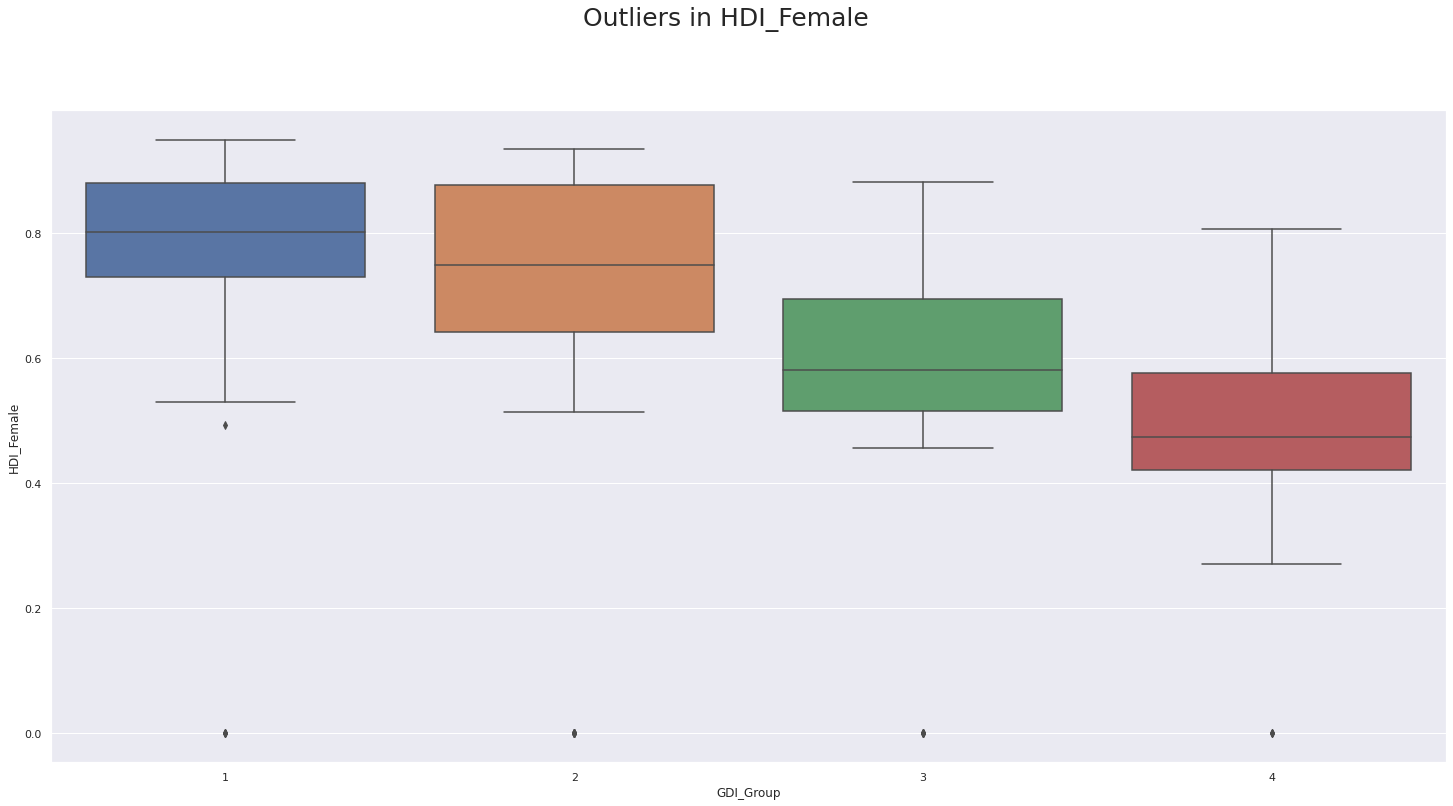

In [39]:
sns.boxplot( x= 'GDI_Group', y='HDI_Female' , data=gdi) 
plt.suptitle('Outliers in HDI_Female',fontsize=25, y=1)

Text(0.5, 1, 'Outliers in HDI_male')

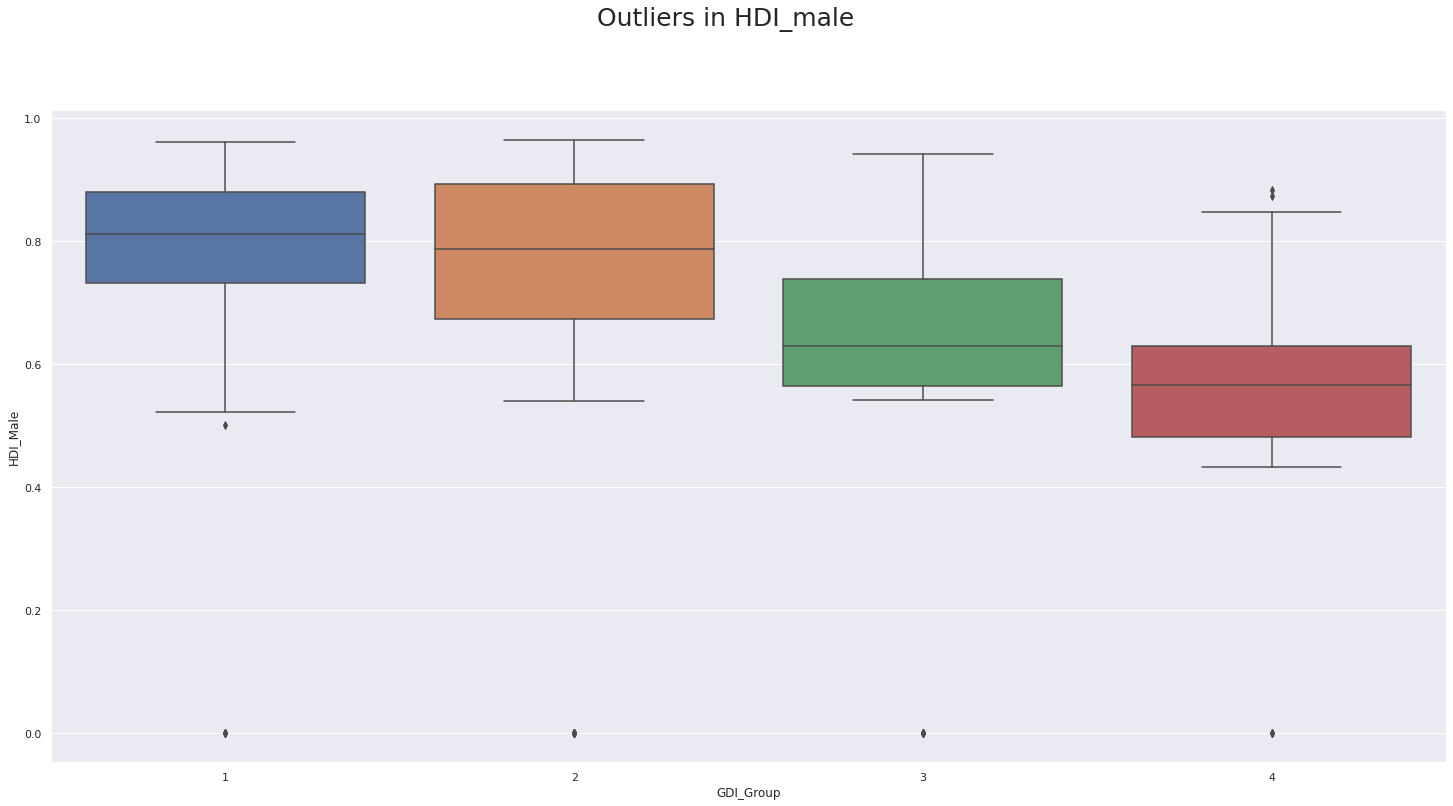

In [40]:
sns.boxplot( x= 'GDI_Group', y='HDI_Male' , data=gdi) 
plt.suptitle('Outliers in HDI_male',fontsize=25, y=1)

Text(0.5, 1, 'Outliers in Lif_Expec_Female')

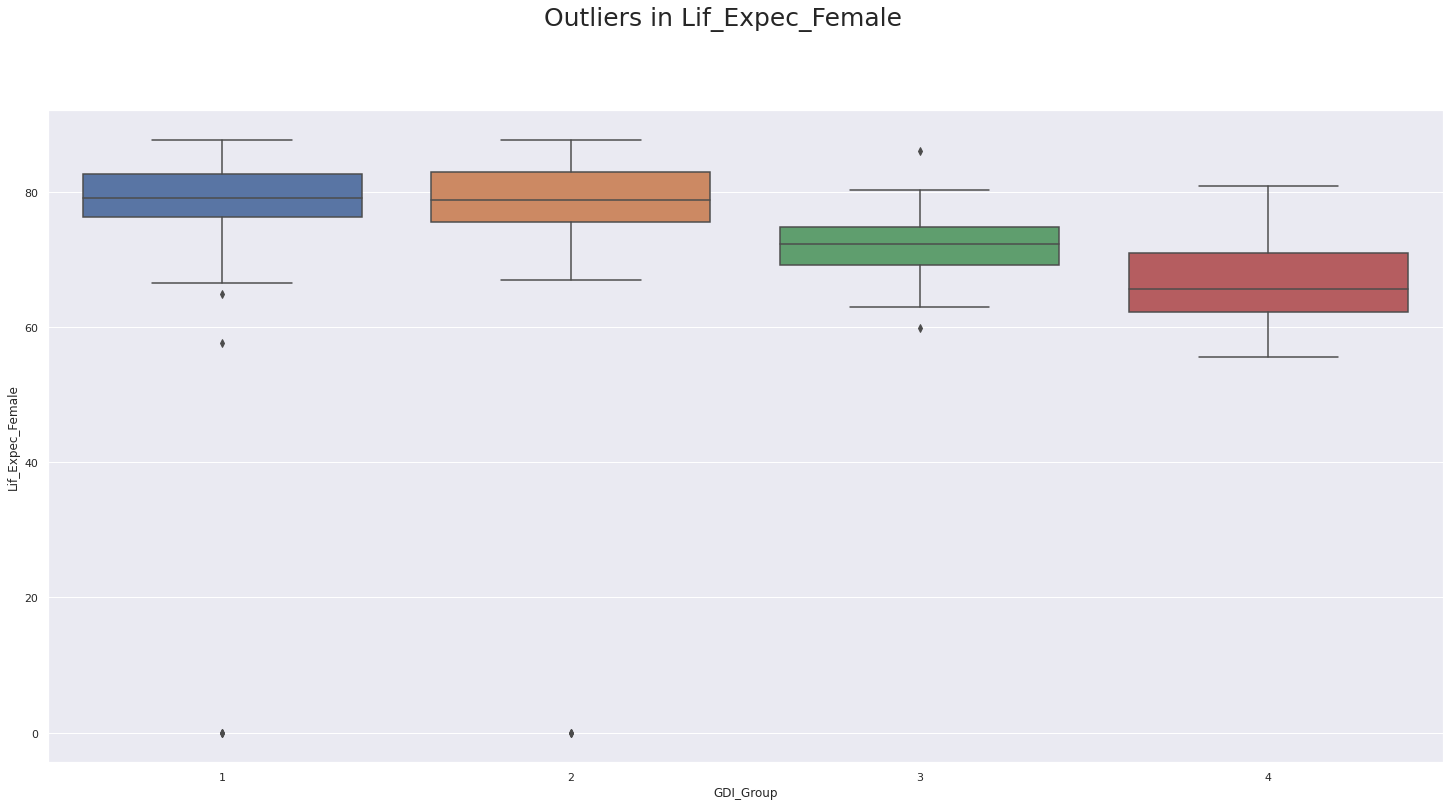

In [41]:
sns.boxplot( x= 'GDI_Group', y='Lif_Expec_Female' , data=gdi) 
plt.suptitle('Outliers in Lif_Expec_Female',fontsize=25, y=1)

Text(0.5, 1, 'Outliers in Lif_Expec_male')

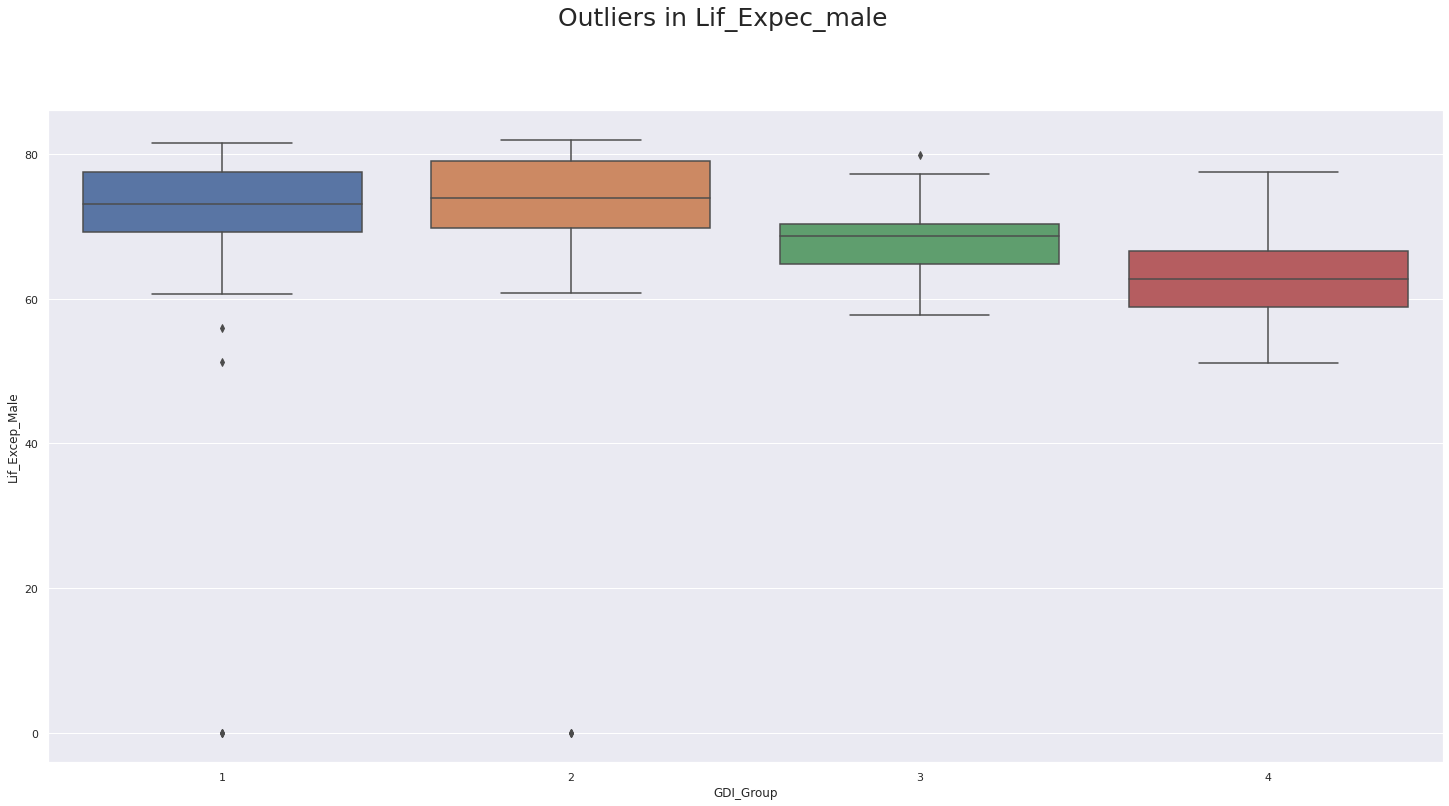

In [42]:
sns.boxplot( x= 'GDI_Group', y='Lif_Excep_Male' , data=gdi) 
plt.suptitle('Outliers in Lif_Expec_male',fontsize=25, y=1)

From the above observations its clear our dataset has outliers but we will not remove these outliers because they occur due to the variability of our data and not as a result of misrecording

## **Exploratory Data Analysis**

**1. Univarite Data Analysis**

Text(0.5, 1, 'Distribution Across all  Attributes')

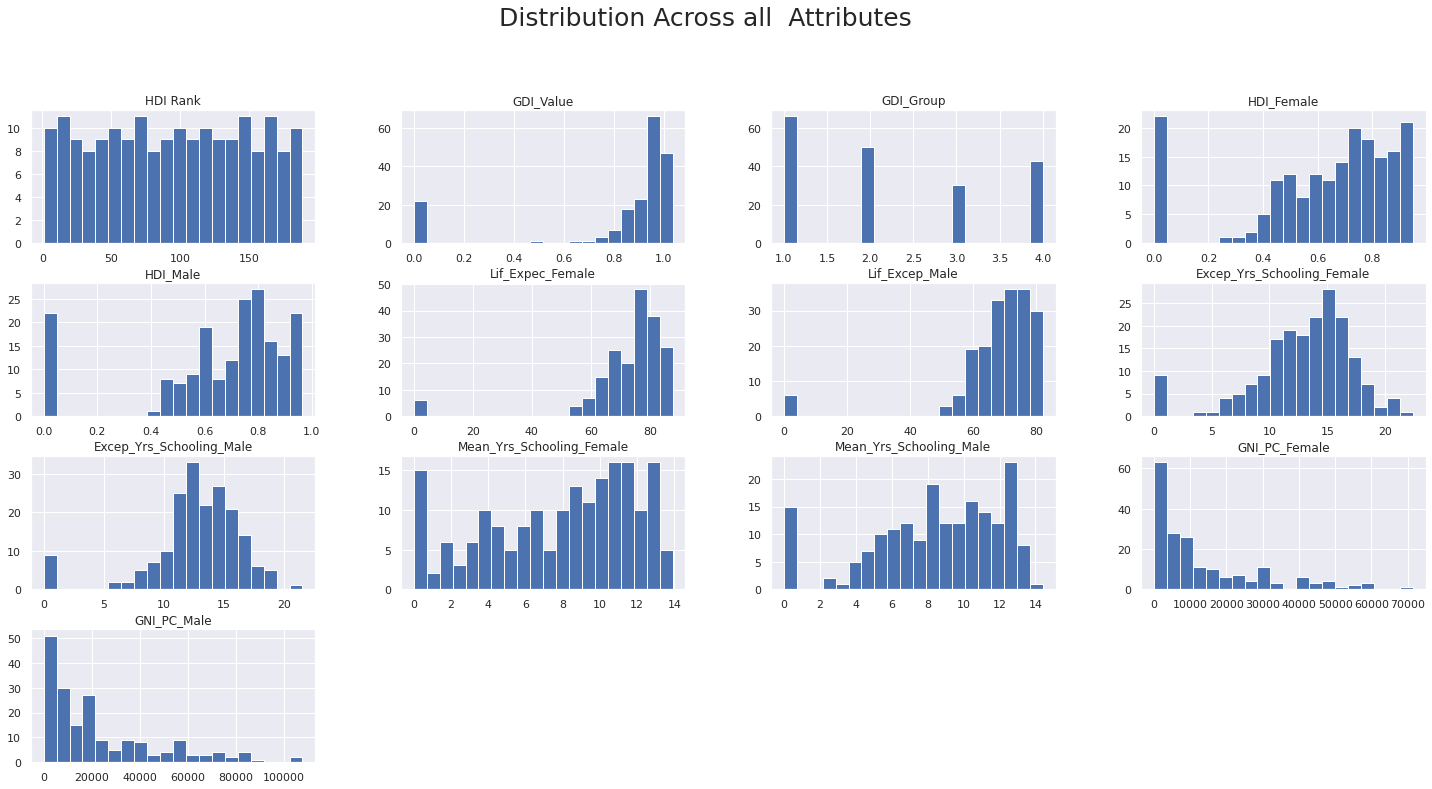

In [43]:
#Visual of the GDI_Value distribution
gdi.hist( bins=20)
plt.suptitle( 'Distribution Across all  Attributes', fontsize= 25, y=1)

**1.Life Expectancy**

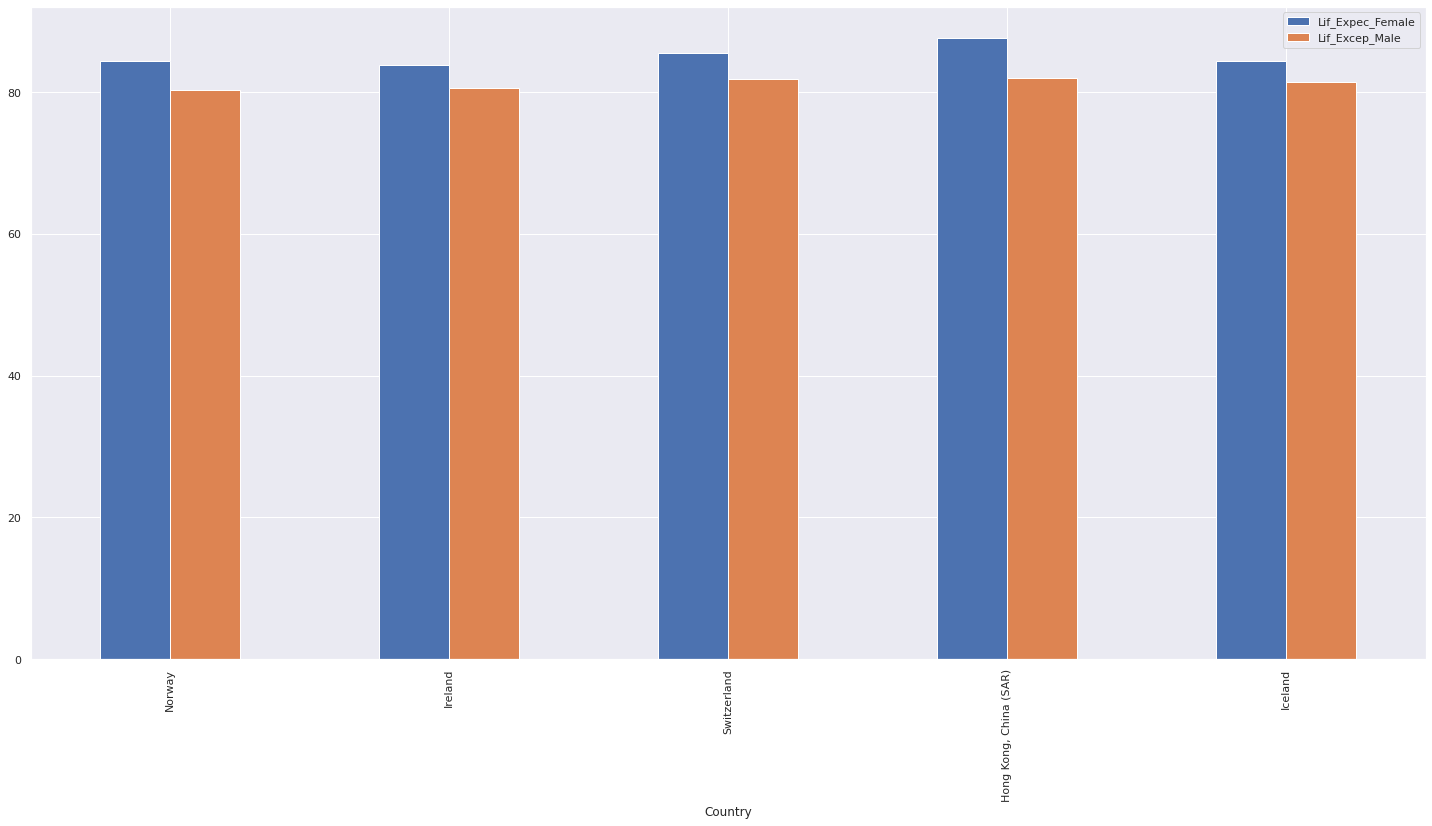

In [96]:
gdi.head(5).plot(x="Country", y=["Lif_Expec_Female", "Lif_Excep_Male"], kind="bar")

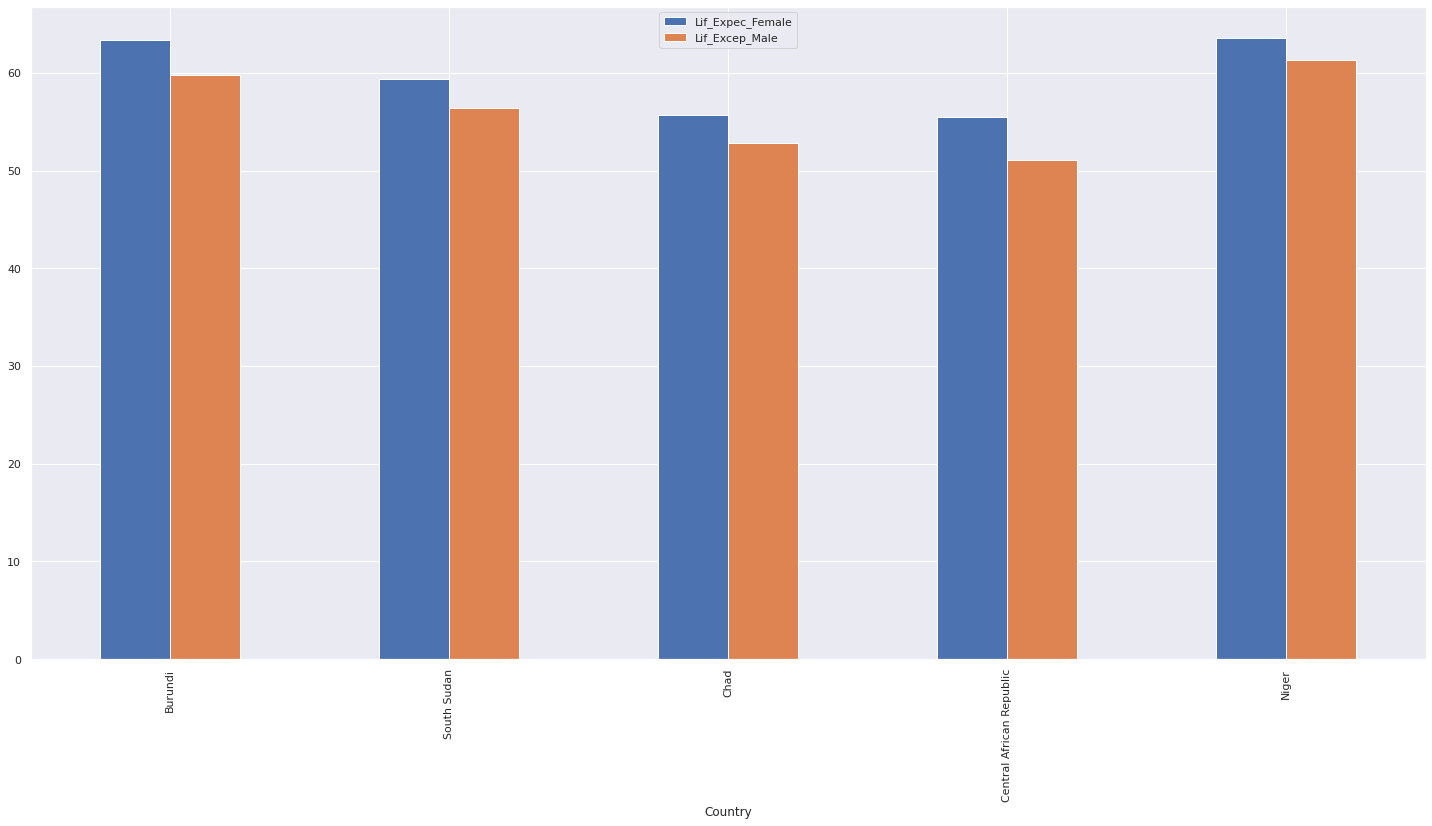

In [97]:
gdi.tail(5).plot(x="Country", y=["Lif_Expec_Female", "Lif_Excep_Male"], kind="bar")

We can clearly see that the life Maximum life expectancy for top countries is 80years with HOng kong having the highest life expectancy. The maximum life expectancy for Bottom countries inthe GDI is 60years with Chad and Central African Republic having the lowest life expectancy

In [45]:
#skewness and kurtosis for female life expectancy
print("Female Life Expectancy at Birth->Skewness: %f" % gdi['Lif_Expec_Female'].skew())
print("Female Life Expectancy at Birth->Kurtosis: %f" % gdi['Lif_Expec_Female'].kurt())
print('')

Female Life Expectancy at Birth->Skewness: -3.470695
Female Life Expectancy at Birth->Kurtosis: 14.242035



In [47]:
#skewness and kurtosis for male life expectancy
print("Male Life Expectancy at Birth->Skewness: %f" % gdi['Lif_Excep_Male'].skew())
print("Male Life Expectancy at Birth->Kurtosis: %f" % gdi['Lif_Excep_Male'].kurt())

Male Life Expectancy at Birth->Skewness: -3.404416
Male Life Expectancy at Birth->Kurtosis: 14.028247


Both the female and male life expectancy  variables are platykurtic and negatively skewed 

**2 Gross National Income per capita (GNC_PC)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



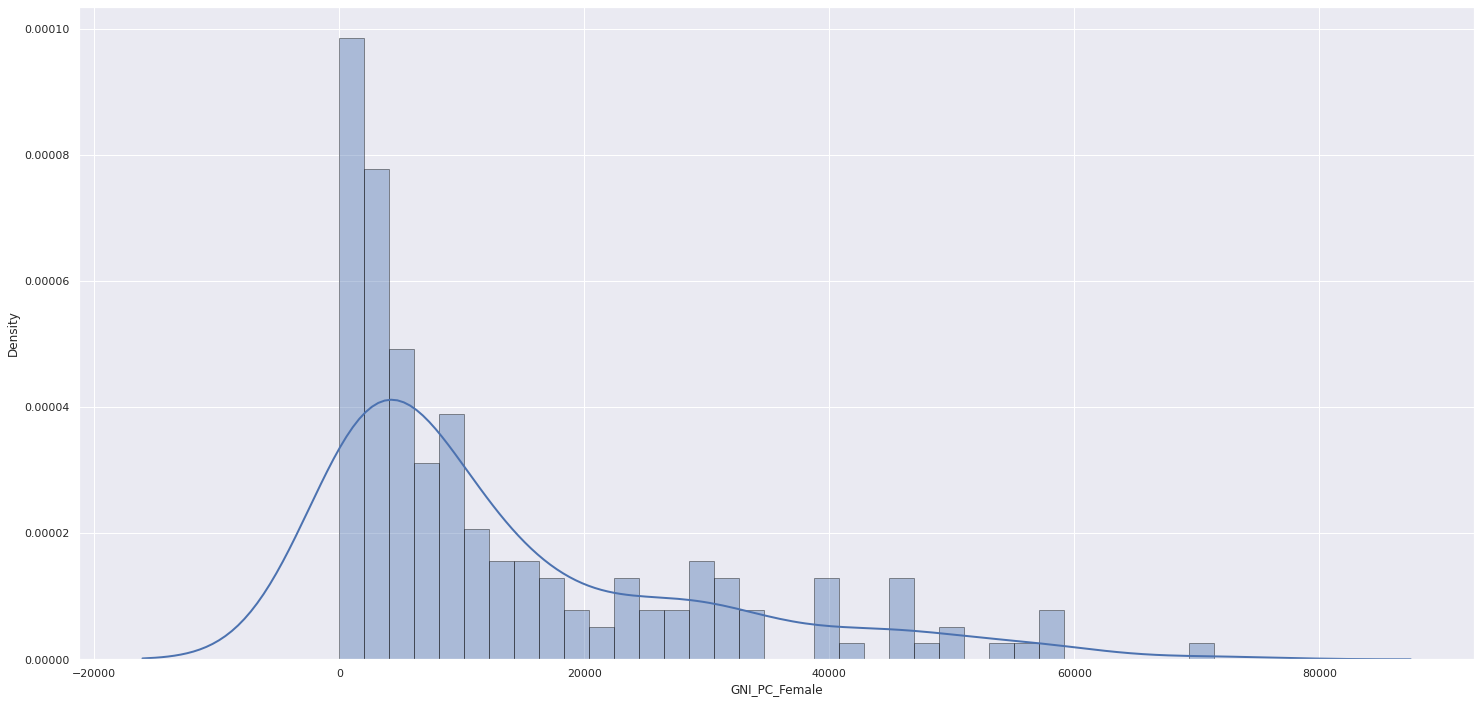

In [48]:
#Female Distribution of gross national income per capita
sns.distplot(gdi['GNI_PC_Female'], hist=True, kde=True, 
             bins=int(35), color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='Female Gross National Income')

In [49]:
#skewness and kurtosis for female GNI_PC
print("Female Gross National Income (GNI) per Capita->Skewness: %f" % gdi['GNI_PC_Female'].skew())
print("Female Gross National Income (GNI) per Capita->Kurtosis: %f" % gdi['GNI_PC_Female'].kurt())
print('')

Female Gross National Income (GNI) per Capita->Skewness: 1.479508
Female Gross National Income (GNI) per Capita->Kurtosis: 1.527187



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



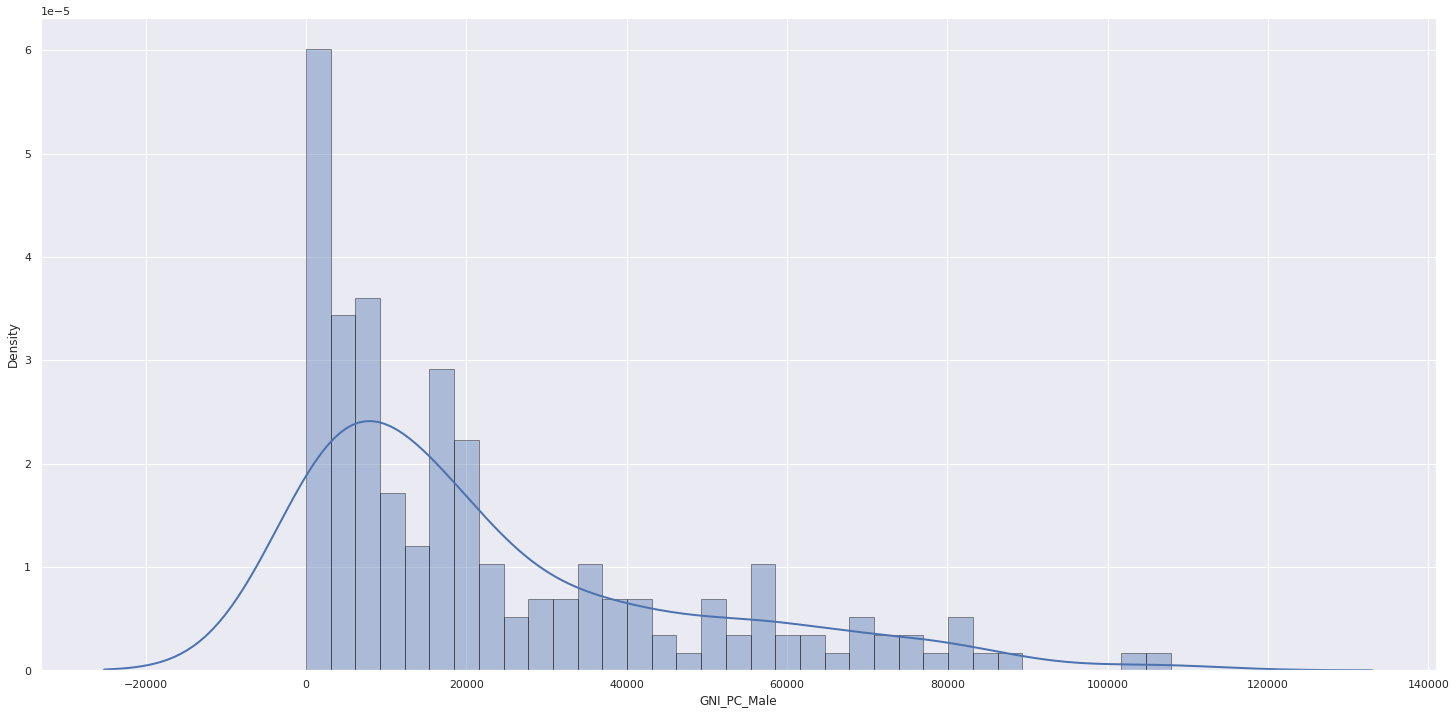

In [50]:
#male Distribution of gross national income
sns.distplot(gdi['GNI_PC_Male'], hist=True, kde=True, 
             bins=int(35), color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [51]:
#skewness and kurtosis for male GNI_PC


print("Male Gross National Income (GNI) per Capita->Skewness: %f" % gdi['GNI_PC_Male'].skew())
print("Male Gross National Income (GNI) per Capita->Kurtosis: %f" % gdi['GNI_PC_Male'].kurt())


Male Gross National Income (GNI) per Capita->Skewness: 1.333057
Male Gross National Income (GNI) per Capita->Kurtosis: 1.088133


Both the female and male GNI_PC variables are leptokurtic and positively skewed

In [52]:
# check the skewness and kurtosis of each R.V.


print("Female Mean Years of Education->Skewness: %f" % gdi['Mean_Yrs_Schooling_Female'].skew())
print("Female Mean Years of Education->Kurtosis: %f" % gdi['Mean_Yrs_Schooling_Female'].kurt())
print('')

print("Male Mean Years of Education->Skewness: %f" % gdi['Mean_Yrs_Schooling_Male'].skew())
print("Male Mean Years of Education->Kurtosis: %f" % gdi['Mean_Yrs_Schooling_Male'].kurt())
print('')

print("Female Expected Years of Schooling->Skewness: %f" % gdi['Excep_Yrs_Schooling_Female'].skew())
print("Female Expected Years of Schooling->Kurtosis: %f" % gdi['Excep_Yrs_Schooling_Female'].kurt())
print('')

print("Male Expected Years of Education->Skewness: %f" % gdi['Excep_Yrs_Schooling_Male'].skew())
print("Male Expected Years of Education->Kurtosis: %f" % gdi['Excep_Yrs_Schooling_Male'].kurt())
print('')


Female Mean Years of Education->Skewness: -0.499524
Female Mean Years of Education->Kurtosis: -0.878387

Male Mean Years of Education->Skewness: -0.759739
Male Mean Years of Education->Kurtosis: -0.024117

Female Expected Years of Schooling->Skewness: -1.103505
Female Expected Years of Schooling->Kurtosis: 1.712063

Male Expected Years of Education->Skewness: -1.503971
Male Expected Years of Education->Kurtosis: 3.459653



In [53]:
#proportion of GDI groups
gdi['GDI_Group'].value_counts(normalize=True)*100

1    34.920635
2    26.455026
4    22.751323
3    15.873016
Name: GDI_Group, dtype: float64

GDI group 1 has the highest proportion than all the groups with a total percentage of 34.92

**2. Bivarite Data Analysis**

In [54]:
gdi.columns

Index(['HDI Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

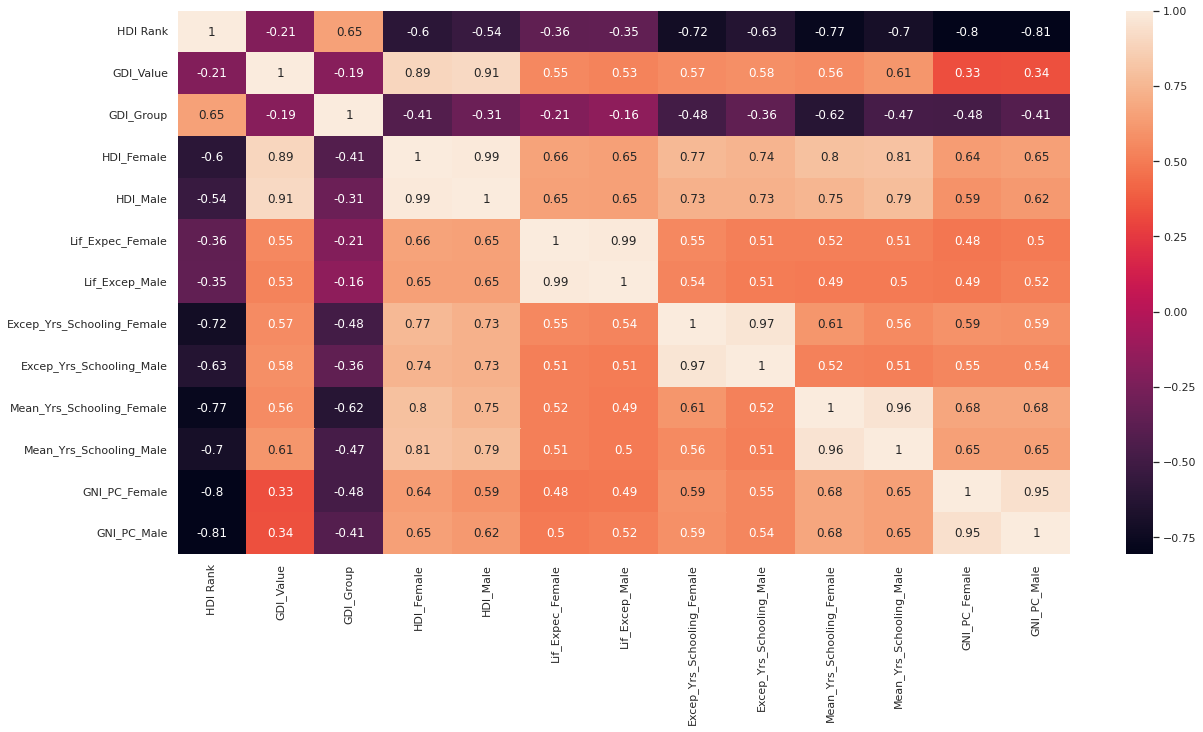

In [55]:
correlations =gdi.corr()
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot = True)

We have noticable correlation:


*   There is strong correlation(0.99) between HDI_male and HDI female
*   There is also a strong correlation between GDI value and HDI for each gender (0.89 corr in female and 0.91 in male).


*   There is aslo a strong correlation between gross national income in male vs female (0.95)





# **Which countries have the largest and the lowest GDI?**





In [56]:
top10 = gdi.sort_values(by='HDI Rank')
top10 = top10[:10]

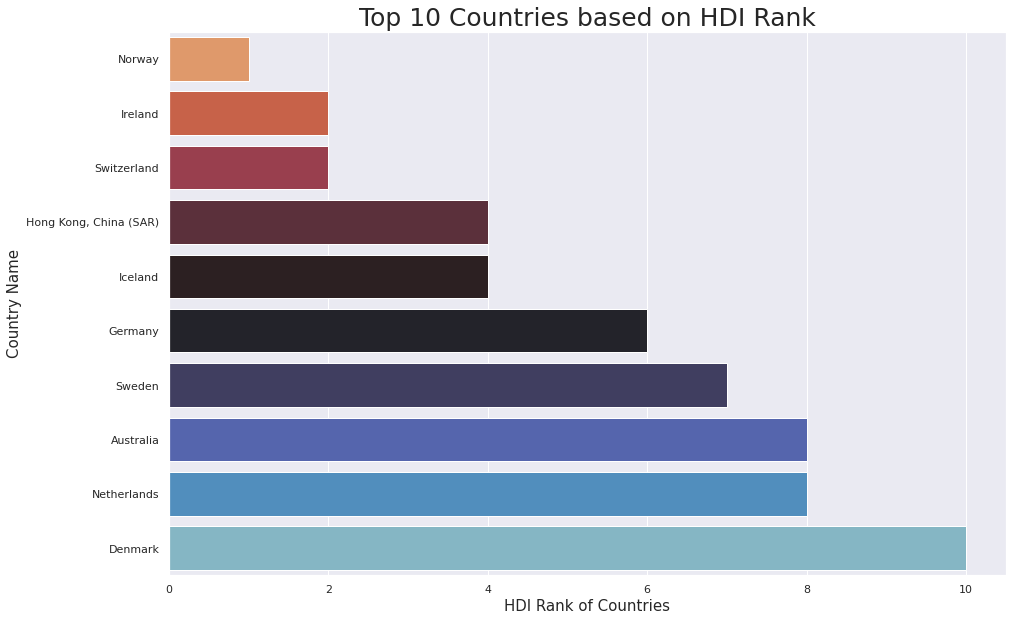

In [57]:
label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}
plt.figure(figsize=(15,10));
sns.barplot(y='Country',x='HDI Rank',data=top10,palette='icefire_r');
plt.xlabel('HDI Rank of Countries',fontdict=label_font);
plt.ylabel('Country Name',fontdict=label_font);
plt.title('Top 10 Countries based on HDI Rank',fontdict=title_font);

Norway had the highest Human development index  in 2019  being closely followed by both ireland and switzerland

In [58]:
last10 = gdi.sort_values(by='HDI Rank')
last10 = last10[-10:]

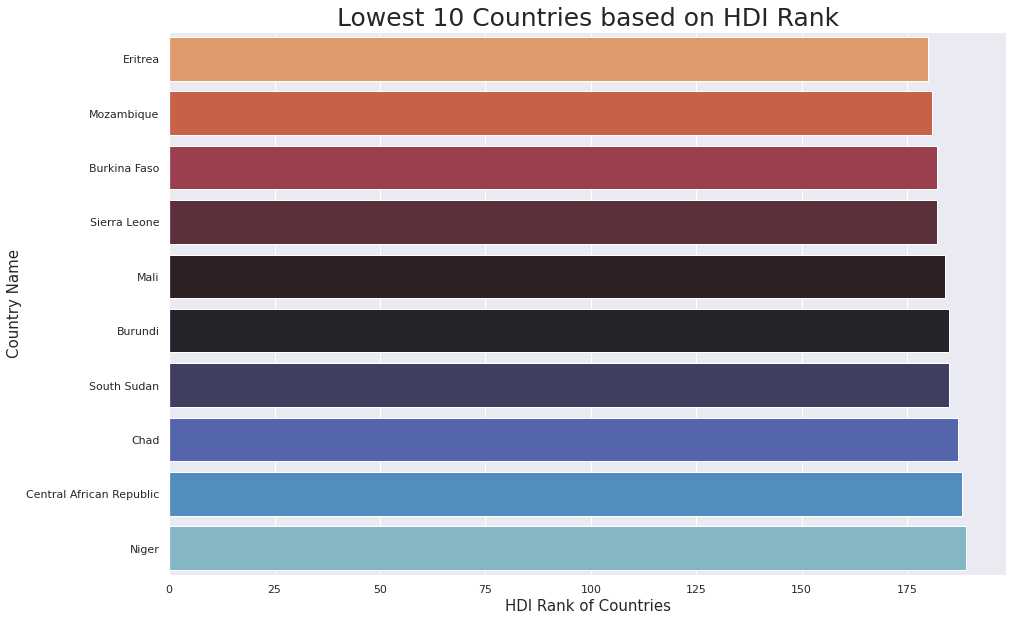

In [59]:
label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}
plt.figure(figsize=(15,10));
sns.barplot(y='Country',x='HDI Rank',data=last10,palette='icefire_r');
plt.xlabel('HDI Rank of Countries',fontdict=label_font);
plt.ylabel('Country Name',fontdict=label_font);
plt.title('Lowest 10 Countries based on HDI Rank',fontdict=title_font);

Niger had the lowest Human development index ,followed by central African Republic then chad.

## **What is the average years of education a female receives in the top 10 HDI(Human Dev Index) countries vs the least 10 ranked countries?**

In [60]:
px.bar(gdi.head(10).sort_values(by=['Mean_Yrs_Schooling_Female']),
       x="Country",y="Mean_Yrs_Schooling_Female",
       title="Average number of years a female is educated in the top 10 HDI ranked contries")

In [61]:
px.bar(gdi.tail(10).sort_values(by=['Mean_Yrs_Schooling_Female']),
       x="Country",y="Mean_Yrs_Schooling_Female",
       title="Average number of years a female is educated in the bottom 10 HDI ranked contries")

The average years for which a female receives education in a top HDI ranked country is 12-14, whereas it is a maximum of 3 years in a country ranked bottom 10 on the HDI index!

## **What is the average years of education a male receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?**

In [62]:
px.bar(gdi.head(10).sort_values(by=['Mean_Yrs_Schooling_Male']),
       x="Country",y="Mean_Yrs_Schooling_Male",
       title="Average number of years a Male is educated in the top 10 HDI ranked contries")

In [63]:
px.bar(gdi.tail(10).sort_values(by=['Mean_Yrs_Schooling_Male']),
       x="Country",y="Mean_Yrs_Schooling_Male",
       title="Average number of years a Male is educated in the bottom 10 HDI ranked contries")

The average years for which a male receives education in a top HDI ranked country is 12-14.4, whereas it is a maximum of 5.6 years in a country ranked bottom 10 on the HDI index!

## **What is the average gross national income per capita a female receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?**

In [64]:
px.bar(gdi.head(10).sort_values(by=['GNI_PC_Female']),
         x="Country",y="GNI_PC_Female",
         title="Average Gross National Income per capita a female recieves in the top 10 HDI ranked contries")

In [65]:
px.bar(gdi.tail(10).sort_values(by=['GNI_PC_Female']),
       x="Country",y="GNI_PC_Female",
       title="Average Gross National Income per capita a female recieves in the bottom 10 HDI ranked contries")

The average gross national income per capita a female recieves in the top 10 HDI ranked contries is between 40k - 55k, whereas it is between 500 - 2k in a countries ranked bottom 10 on the HDI index!

## **What is the average gross national income per capita a male receives in the top GDI(Gender Dev Index) countries vs the least 10 ranked countries?**



In [66]:
px.bar(gdi.head(10).sort_values(by=['GNI_PC_Male']),
       x="Country",y="GNI_PC_Male",
       title="Average Gross National Income per capita a Male recieves in the top 10 HDI ranked contries")

In [67]:
px.bar(gdi.tail(10).sort_values(by=['GNI_PC_Male']),
       x="Country",y="GNI_PC_Male",
       title="Average Gross National Income per capita a Male recieves in the bottom 10 HDI ranked contries")

The average gross national income per capita a Male recieves in the top 10 HDI ranked contries is between 55k - 80k, whereas it is between 600 - 3k in a countries ranked bottom 10 on the HDI index!

Female are still struggling to earn as much as men even in low income countries

**3. Multivariate Data Analysis**

Here we perform Dimension Reduction which refers to the process of converting a set of data having vast dimensions into data with lesser dimensions ensuring that it conveys similar information concisely

In [68]:
gdi.columns

Index(['HDI Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

# **Linear Discriminatory Analysis (LDA)**

We chose LDA since we interest in maximizing the separability between our measure which is a categorical variable HDI group.

Mainly LDA focuses on maximizing the separability among known categories in our cse HDI groups ( 1 = Very High development 2 = High development 3 = Medium development 4 = Low development)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
#define predictor and response variables
X = gdi[['HDI_Female', 'HDI_Male']]
y = gdi['GDI_Group']



In [111]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

  
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
  
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.7368421052631579
[[18  1  0  1]
 [ 1  3  0  2]
 [ 0  1  0  3]
 [ 0  1  0  7]]


Our model provided a level of accuracy of 73% which agrees with our metric of success 

## **HYPOTHESIS TESTING**

In [79]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import norm
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import shapiro 
import scipy.stats as stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [80]:
gdi.columns

Index(['HDI Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

### **1. Hypothesis**

From our problem we can derive the hypotheis we want to test

**Null Hypothesis** -the Average global gender development index equals 0.943


**Alternative Hypotheis** - the Average global gender development index is higher than 0.943

Our **Significance level** will be 0.05

In [81]:
#we calculate the population
gdi[['GDI_Value']].mean() 

GDI_Value    0.829693
dtype: float64

We can see that our calculated mean for gender development index is 0.829693. Definitely we can
see that there is difference in the means of the index in question from presumed mean
But the question is, is this difference in the mean stastically significant or was it just due to random chance 

**2. Sampling**

We decided to continue with Stratified random sampling with our focus being the GDI groups but we need to determine our sample size


**Determining our sample size Using Yamane's formula**

To get to the preferred sample size there are things we need to consider:

1. **Population size** - our population is 189. so we need a sample that doesn't under represent us.

2. How **confidence** we want our results to be in respect to our population - The **confidence interval** expected is **95%** for our sample size

3. **Margin of error **- since errors are inevitable we want to take into account how much difference we’ll allow between the mean number of our sample and the mean number of our population.** our margin of error 5%**


Yamane's formula sample size

n = N/(1+N(e)2.

Where:

n = sample size

e = precision level(In our case 0.05)

N = population size( in our case 189)

n = 189/((1 + 189(0.05 * 0.05))

n= 128


From this we arrived at a sample of **128**

In [82]:
#define total sample size desired
N = 128

#perform stratified random sampling

gdi_sample = gdi.groupby('GDI_Group', 
                         group_keys=False).apply(
                             lambda x: x.sample(int(np.rint(N*len(x)/len(gdi))))).sample(frac=1).reset_index(drop=True)

In [83]:
gdi_sample.head()

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,48.0,Montenegro,0.966,2,0.814,0.843,79.3,74.4,15.4,14.7,10.9,12.3,17518,25368
1,39.0,Slovakia,0.992,1,0.855,0.862,81.0,74.0,15.0,14.0,12.6,12.8,24618,40014
2,138.0,Eswatini (Kingdom of),0.996,1,0.609,0.611,64.8,56.0,11.8,11.9,6.3,7.2,7011,8863
3,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,39287,56954
4,188.0,Central African Republic,0.801,4,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,1197


In [84]:
#our sample shape
gdi_sample.shape

(128, 14)

In [85]:
#sample mean 
gdi_sample[['GDI_Value']].mean() 

GDI_Value    0.845656
dtype: float64

In [86]:
#sample Standard deviation
gdi_sample[['GDI_Value']].std() 

GDI_Value    0.293637
dtype: float64

**3. Testing our hypothesis**

We used Z Test since our sample satisfies all the assumptions:

a. Your sample size is greater than 30. ours sample is 128

b. Data points should be independent from each other.(using HDI which are independet in both gender) 

3. Your data should be normally distributed.However, for large sample sizes (over 30) this doesn’t always matter. 

4. Your data should be randomly selected from a population, where each item has an equal chance of being selected.(used startified random sampling to ensure all our groups have equal chances

5. Sample sizes should be equal if at all possible.

In [87]:
ztest ,pval = stests.ztest(gdi_sample['GDI_Value'], x2=None, value=0.83)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.5463565509979069
accept null hypothesis


We See our p value is 0.752 which indictates we have no enough evidence to reject the null in favor of the alternative and therefore we accept the null 

**confidence interval**

In [88]:
#we can also calculate our confidence interval which is 95%
# Finding the standard error
# then calculate the confidence interval
sample_mean = gdi_sample['GDI_Value'].mean()
sample_mean
std_error = gdi_sample['GDI_Value'].std() / np.sqrt(128)
std_error

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(0.7947871755821837, 0.8965253244178161)


Our population mean is 0.83 and the confidence Interval of our sample is (0.76, 0.88)
This observation tell us that indeed our sample is accurate to test our hypothesis and prove our null hypothesis to be true

# **Discussion and conclusion**


1.   Norway had the highest Human development index in 2019 being closely followed by both ireland and switzerland
2.   Niger had the lowest Human development index ,followed by central African Republic then chad.(Due to the effect that economies can often suffer from the "snowball" effect, the fact that two-thirds of the nation live below the poverty line of making less than $1 a day, Niger's low HDI is a direct result from poor healthcare, a meager economy, and a lack of centralized, nationalized infrastructure.)

3.   The average years for which a female receives education in a top HDI ranked country is 12-14, whereas it is a maximum of 3 years in a country ranked bottom 10 on the HDI index!

4.  The average years for which a male receives education in a top HDI ranked country is 12-14.4, whereas it is a maximum of 5.6 years in a country ranked bottom 10 on the HDI index!

5.   The average gross national income per capita a female recieves in the top 10 HDI ranked contries is between 40k - 55k, whereas it is between 500 - 2k in a countries ranked bottom 10 on the HDI index!
6.   The average gross national income per capita a Male recieves in the top 10 HDI ranked contries is between 55k - 80k, whereas it is between 600 - 3k in a countries ranked bottom 10 on the HDI index!(Female are still struggling to earn as much as men even in low income countries)


7.   Using LDA algorithm we are able to make a prediction of a coutries HDI group with 73% accuracy


8.   Using Z test to test our hypothesis we are able to confidentily say we have no enough evidence to reject the null in favor of the alternative and therefore we accept the null(Null Hypothesis -the Average global gender development index equals 0.943: Alternative Hypotheis - the Average global gender development index is higher than 0.943)






## **Recommendations**

With aim to close gender gap both in education, ecomony and other dimentions of development index. Here are some recommendations:

*  The position of women, as well as gender norms, may differ between ethnic, religious, educational and other groups living in different areas of a country. Hence there is need for an index that reveals the gender differences in human development within countries on a global scale.

*   It’s important to avoid old and sometimes well-ingrained stereotypes such as ‘blue for boys’ and ‘pink for girls’, or ‘tough boys’ and ‘caring’ girls, boys don't cry etc

*  Eliminating the wage gap and hiring sterotypes could also benefit the world economy in many other ways. 


*   Gender gap is affected by other aspects in the spectrum other than just the three dimensions discussed here. Focusing also on these areas would have a ripple effect in bridging the overall gender gap. some of these areas include politics(Develop a
global partnership for development), Eradicate extreme poverty and
hunger, Reduce child mortality, Improve maternal health






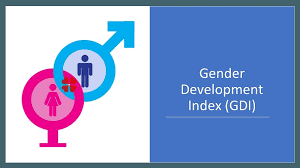